In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import transforms, datasets

import torch.nn as nn # alias of Neural Network

import time

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the dataset

In [ ]:
# convert the images in to tensor formate
custom_transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
train_dataset = datasets.MNIST(root="/content/dataset", train=True, download=True, transform=custom_transform)
test_dataset = datasets.MNIST(root="/content/dataset", train=False, download=True, transform=custom_transform)

In [ ]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [ ]:
# load the data in the batches bcs fitting all data in the memory is not feasible
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
sample1 = iter(train_loader)
sample_img, sample_label = next(sample1)

In [ ]:
sample_img[0][0].shape

torch.Size([28, 28])

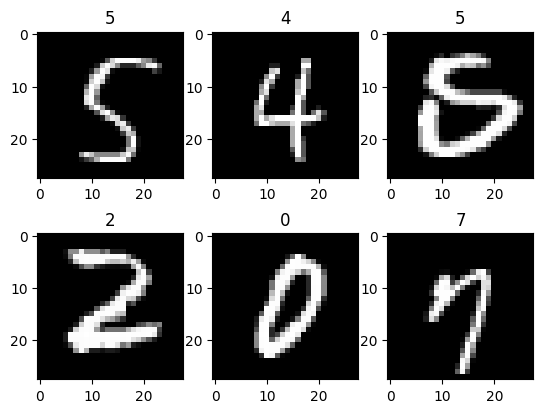

In [ ]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(sample_img[i][0], cmap='gray')
  plt.title(sample_label[i].item())

# Build NN using PyTorch

In [ ]:
class MnistClassifier(nn.Module):
  def __init__(self):
    super(MnistClassifier, self).__init__()

    self.layer1 = nn.Linear(28*28, 500)
    self.relu = nn.ReLU() # Activation Function for introduce Non-Linearity
    self.layer2 = nn.Linear(500, 250)
    self.layer3 = nn.Linear(250, 125)
    self.out = nn.Linear(125, 10)

  def forward(self, img):
    x = self.layer1(img)
    x = self.relu(x)
    x = self.layer2(x)
    x = self.relu(x)
    x = self.layer3(x)
    x = self.relu(x)
    out = self.out(x)
    return out

In [ ]:
model = MnistClassifier().to(device)

In [ ]:
print(model)

MnistClassifier(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=250, bias=True)
  (layer3): Linear(in_features=250, out_features=125, bias=True)
  (out): Linear(in_features=125, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss() # define loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # optimise the loss function

# Train our Model

In [ ]:
%%timeit

start_time = time.time()
for epoch in range(50):
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.reshape(-1, 28*28) # flatten the image (2d to 1d array/img)
        pred_labels = model(images)

        loss = criterion(pred_labels, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss
    print(f"{epoch+1} loss is: {total_loss}")
end_time = time.time()
print(f"Total time for tainning model: {end_time-start_time}")

1 loss is: 4307.46435546875
2 loss is: 4275.5986328125
3 loss is: 4218.748046875
4 loss is: 4084.524658203125
5 loss is: 3675.3779296875
6 loss is: 2821.243408203125
7 loss is: 1970.6763916015625
8 loss is: 1508.5830078125
9 loss is: 1274.3367919921875
10 loss is: 1122.8360595703125
11 loss is: 1007.8237915039062
12 loss is: 917.6640014648438
13 loss is: 848.2455444335938
14 loss is: 794.4550170898438
15 loss is: 752.308837890625
16 loss is: 718.4047241210938
17 loss is: 690.4691162109375
18 loss is: 666.964599609375
19 loss is: 645.91748046875
20 loss is: 627.6376953125
21 loss is: 610.6399536132812
22 loss is: 595.0084838867188
23 loss is: 580.5064697265625
24 loss is: 566.32470703125
25 loss is: 552.8751831054688
26 loss is: 539.8323364257812
27 loss is: 527.8363037109375
28 loss is: 515.8226318359375
29 loss is: 504.39300537109375
30 loss is: 493.23779296875
31 loss is: 482.49273681640625
32 loss is: 472.28338623046875
33 loss is: 462.131103515625
34 loss is: 452.46331787109375
35 

# Model Evaluation

In [ ]:
model.eval()
avg_acc = []

with torch.no_grad(): # not update model again

    for test_images, test_labels in test_loader:
        test_images, test_labels = test_images.to(device), test_labels.to(device)

        total_correct = 0
        n_sample = test_labels.size(0) # take batch size ex., 32

        test_images = test_images.reshape(-1, 28*28)
        model_out = model(test_images) # prob value
        pred_test_labels = torch.argmax(model_out, dim=1) # clm wise max value predict

        total_correct += (pred_test_labels == test_labels).sum().item()
        accuracy = total_correct/n_sample*100

        avg_acc.append(accuracy)

    print(f"Model accuracy is {np.array(avg_acc).mean():0.2f}%")

Model accuracy is 94.83%
